# Networks descriptive stats

This script is used to add the **descriptive statistics** of each time period to the ***00_{topic}_timeperiods_comparison.csv***file which is located in the 8_Networks/5_analysis folder. 

In order to do so, the script takes as input the dynamic edgelist and the nodes lists developed in scripts 1 and 2 in the 8_networks/3_hyphe_edgelists_folder and it uses it to construct individual graphs for each timeperiod. After that it compiles the timeperiods_comparison.csv with the following variables:
1. number of edges 
2. number of nodes
3. density 
4. compactness
5. average degree
6. modularuty
7. number of communities 

Additionally, the script creates a nodel nodes_list file containing the communities numbers to which each node belongs to in each timeperiod. This is a csv with 69 columns the first of which contains the node names and the 68 the community to which that node belongs to in each of the 68 time periods. 

**The script is run twice** – once for immigration and once for climate – **changing the topic, folder, and topic_name variables** at the beginning

## Step 1 - import libraries and datasets

In [2]:
import pandas as pd 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [27]:
topic = 'CLIM'
folder = '2_climate'
topic_name = 'Climate debate'

edgelist = pd.read_csv(f'/Users/giovanni/masterthesis/8_Networks/3_hyphe_edgelists/{folder}/00_{topic}_dynamic_edgelist_MAIN.csv')
nodes = pd.read_csv(f'/Users/giovanni/masterthesis/8_Networks/3_hyphe_edgelists/{folder}/00_{topic}_nodes_MAIN.csv')
df = pd.read_csv(f'/Users/giovanni/masterthesis/8_Networks/5_analysis/00_{topic}_timeperiods_comparison.csv')

## Step 2 - Prepare functions

In [4]:
def average_degree(G):
    value = 2*nx.number_of_edges(G)/nx.number_of_nodes(G)
    return value
    
def compactness(G):
    
    somma = 0
    
    for i in nx.nodes(G):
        for j in nx.nodes(G):
            
            if i != j:
                try:
                    somma += 1/nx.shortest_path_length(G,source=i,target=j)
                
                except nx.NetworkXNoPath as exception:
                    continue

    value = somma/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
    
    return value


def assign_communities_to_nodeslist(com_list,nodes):
    
    node_community_map = {node: community_id for community_id, community in enumerate(com_list) for node in community}
    
    nodes[f'community_time_{i}'] = None
    
    for index, row in df.iterrows():
    
        community = node_community_map.get(row['Label'])
        nodes.at[index, f'community_time_{i}'] = community

## Step 3 – Run analysis

### STEP 1 - initialize empty columns

In [18]:
df['nodes_number']=None
df['edges_number']=None
df['density']=None
df['avg_degree']=None
df['compactness']=None
df['modularity']=None
df['communities_number']=None

### STEP 2 - run all the main descriptive stats

In [28]:
for i in range(len(df)): 
    df_temp = edgelist[edgelist['time_period'] == i+1]
    
    G = nx.from_pandas_edgelist(df_temp, source='source_label', target='target_label')
    
    df['nodes_number'][i]= G.number_of_nodes()
    df['edges_number'][i]= G.number_of_edges()
    df['density'][i]=nx.density(G)
    df['avg_degree'][i]=average_degree(G)
    df['compactness'][i]=compactness(G)
    
    # The resolution of 0.8 is the one that gives us an average of 5 communities as a result
    #communities = nx.community.louvain_communities(G, resolution = 0.9, threshold=0.0000001, seed=42)
    communities = nx.community.greedy_modularity_communities(G, 5)
    df['modularity'][i] = nx.community.modularity(G, communities)
    df['communities_number'][i] = len(communities)
    
    # Assign communities to nodeslist
    node_community_map = {node: community_id for community_id, community in enumerate(communities) for node in community}
    
    nodes[f'community_time_{i+1}'] = None
    
    for index, row in nodes.iterrows():
        community = node_community_map.get(row['Label'])
        nodes.at[index, f'community_time_{i+1}'] = community

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nodes_number'][i]= G.number_of_nodes()
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edges_number'][i]= G.number_of_edges()
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compactness'][i]=compactness(G)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modularity'][i] = nx.community.modularity(G, communities)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compactness'][i]=compactness(G)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modularity'][i] = nx.community.modularity(G, communities)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nodes_number'][i]= G.number_of_nodes()
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edges_number'][i]= G.number_of_edges()
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compactness'][i]=compactness(G)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modularity'][i] = nx.community.modularity(G, communities)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compactness'][i]=compactness(G)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modularity'][i] = nx.community.modularity(G, communities)
/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_46501/3258943789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

## Step 4 – Save to harddrive

In [29]:
df.drop(columns=['media_outlinks_DER_dim_0','media_outlinks_DER_dim_1','media_inlinks_DER_dim_0','media_inlinks_DER_dim_1'],
       inplace = True)

In [30]:
df.head()

,time_period,start_date,end_date,nodes_number,edges_number,density,avg_degree,compactness,modularity,communities_number
0,1,2017-01-01,2017-01-15,34,38,0.067736,2.235294,0.350004,0.566482,6
1,2,2017-01-15,2017-01-29,34,43,0.076649,2.529412,0.366650,0.495133,5
2,3,2017-01-29,2017-02-12,28,34,0.089947,2.428571,0.399868,0.491782,5
3,4,2017-02-12,2017-02-26,22,24,0.103896,2.181818,0.513709,0.311632,4
4,5,2017-02-26,2017-03-12,25,38,0.126667,3.040000,0.505278,0.340374,4


In [31]:
nodes.head()

,Id,Label,community_time_1,community_time_2,community_time_3,community_time_4,community_time_5,community_time_6,community_time_7,community_time_8,...,community_time_59,community_time_60,community_time_61,community_time_62,community_time_63,community_time_64,community_time_65,community_time_66,community_time_67,community_time_68
0,0,francetvinfo.fr,0,2,0,2,1,0,4,2,...,2,2,4,3,2,1,2,0,2,3
1,1,slate.fr,None,None,None,None,None,None,None,None,...,None,None,None,None,3,0,2,None,0,None
2,2,lavoixdunord.fr,None,None,None,None,None,None,None,None,...,None,3,0,0,3,4,0,2,1,3
3,3,mediacites.fr,2,4,None,None,None,None,None,None,...,4,4,6,4,0,3,4,5,1,6
4,4,rue89lyon.fr,2,4,None,None,None,None,None,None,...,4,4,6,4,0,None,2,5,1,6


In [32]:
df.to_csv(f'/Users/giovanni/masterthesis/8_Networks/5_analysis/00_{topic}_timeperiods_comparison.csv', index=False)
nodes.to_csv(f'/Users/giovanni/masterthesis/8_Networks/3_hyphe_edgelists/{folder}/00_{topic}_nodes_communities_in_time.csv', index=False)

# Plot - IMMIGRATION


In [24]:
plot_df = df.set_index("start_date")

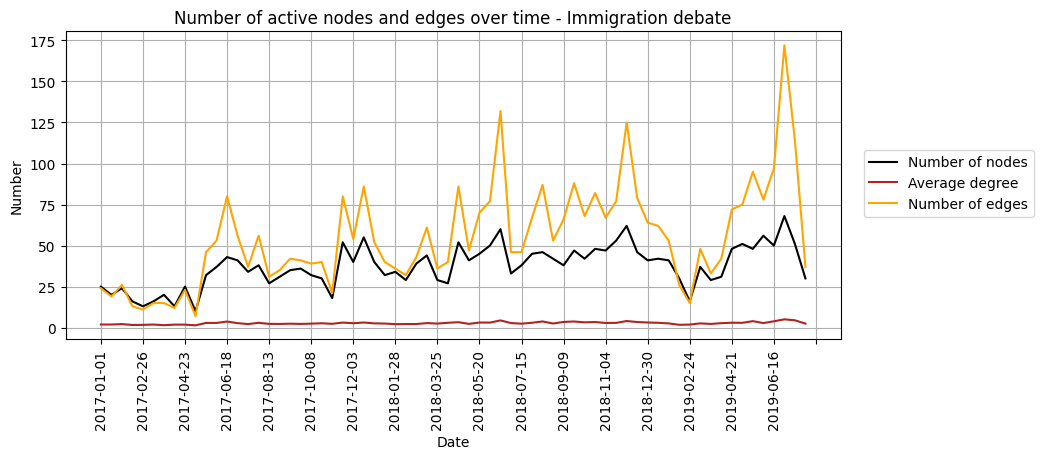

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(plot_df['nodes_number'], linestyle='-', color='black', label='Number of nodes')
ax1.plot(plot_df['avg_degree'], linestyle='-', color='firebrick', label='Average degree')
ax1.plot(plot_df['edges_number'], linestyle='-', color='orange', label='Number of edges')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

#ax2 = ax1.twinx()
#ax2.plot(plot_df['avg_degree'], linestyle='-', color='firebrick', label='Average degree')
#ax2.set_ylabel('Number of edges')
#ax2.tick_params(axis='y')

fig.legend(loc='right',bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Number of active nodes and edges over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

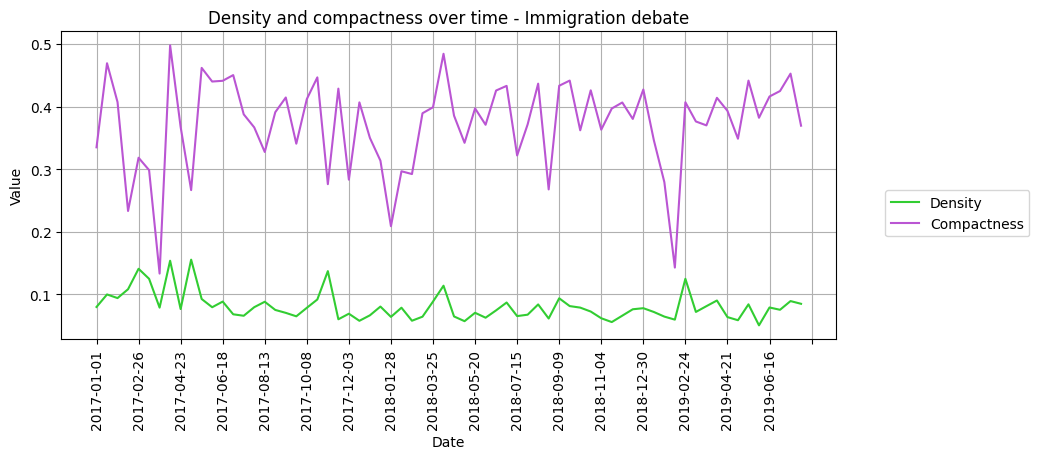

In [47]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(plot_df['density'], linestyle='-', color='limegreen', label='Density')
ax1.plot(plot_df['compactness'], linestyle='-', color='mediumorchid', label='Compactness')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.tick_params(axis='y')
ax1.grid(True)

#ax2 = ax1.twinx()
#ax2.plot(plot_df['compactness'], linestyle='-', color='mediumorchid', label='Compactness')
#ax2.set_ylabel('Compactness')
#ax2.tick_params(axis='y')

fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Density and compactness over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

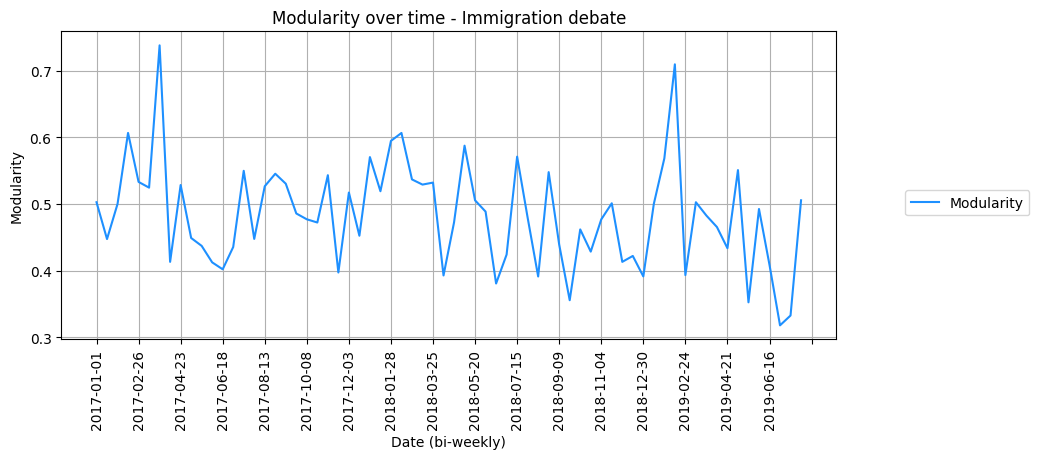

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(plot_df['modularity'], linestyle='-', color='dodgerblue', label='Modularity')
ax1.set_xlabel('Date (bi-weekly)')
ax1.set_ylabel('Modularity')
ax1.tick_params(axis='y')
ax1.grid(True)

fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Modularity over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

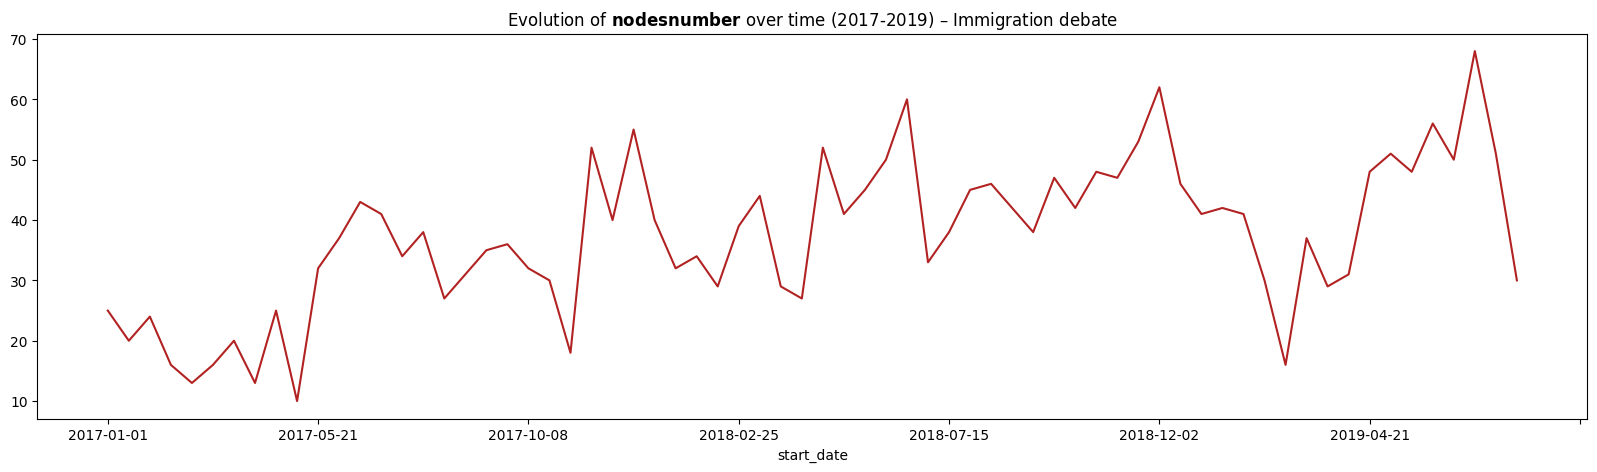

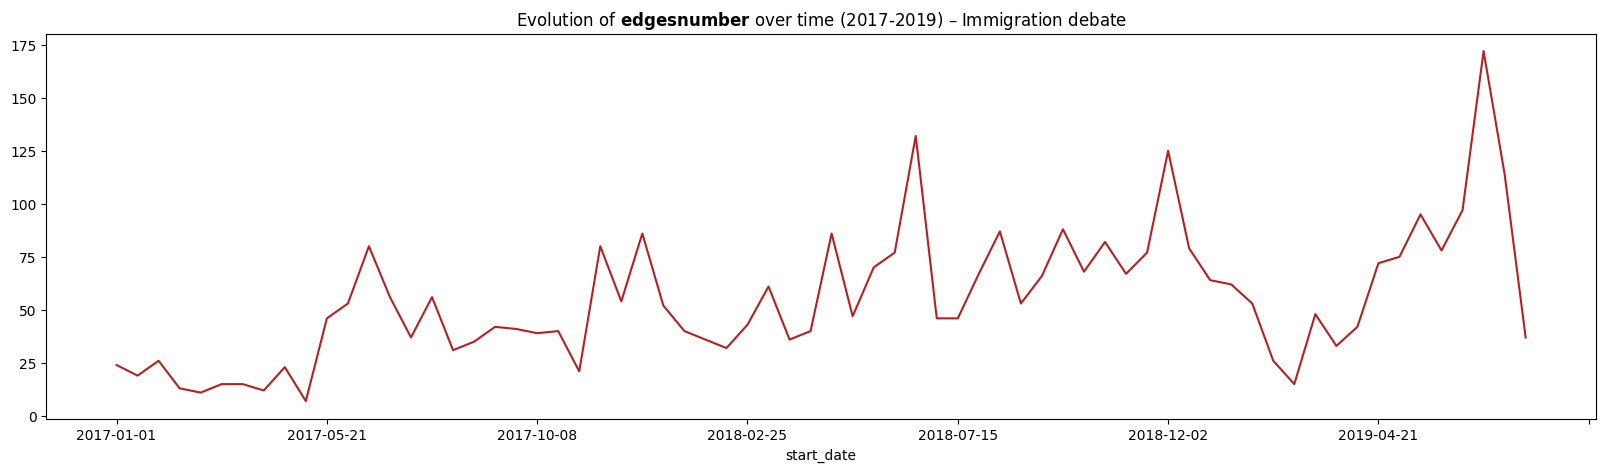

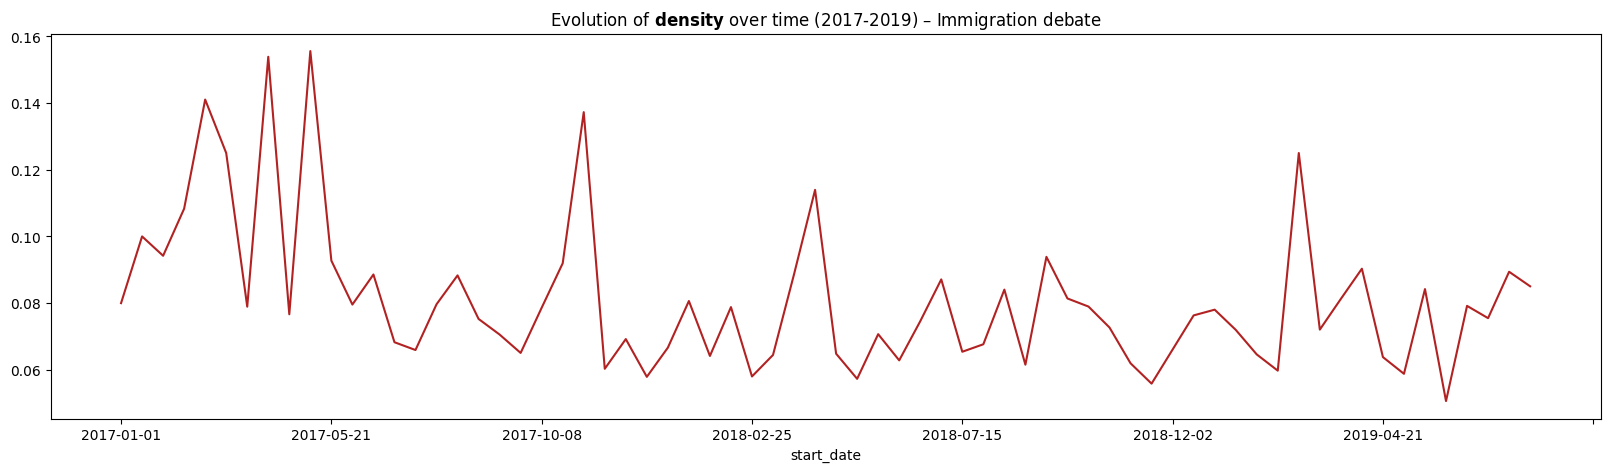

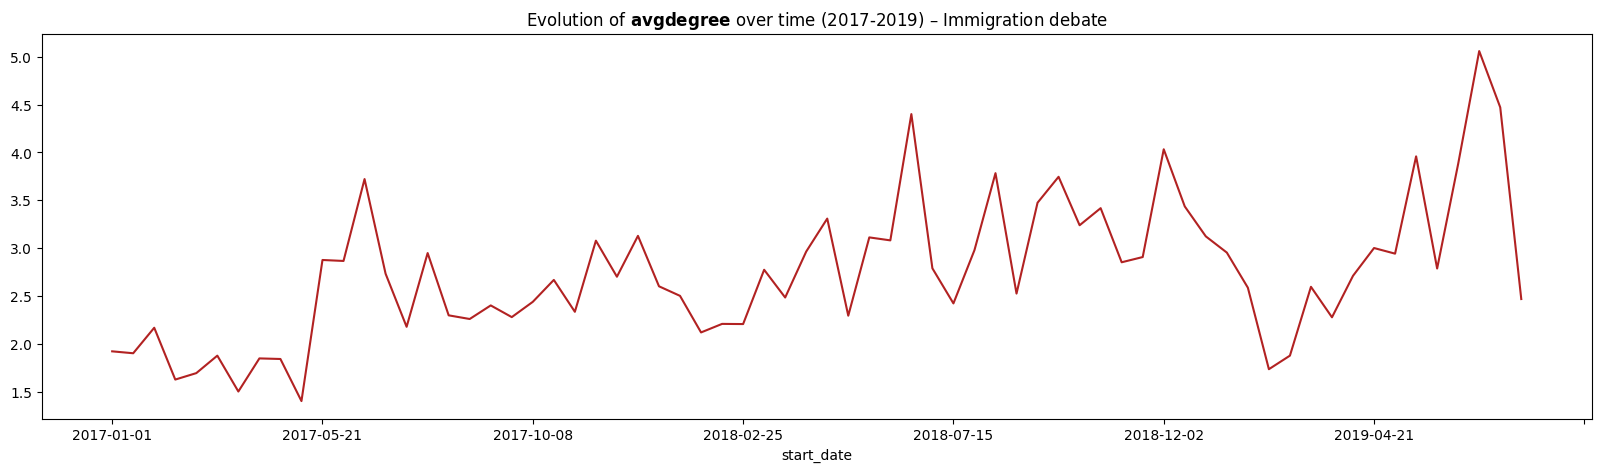

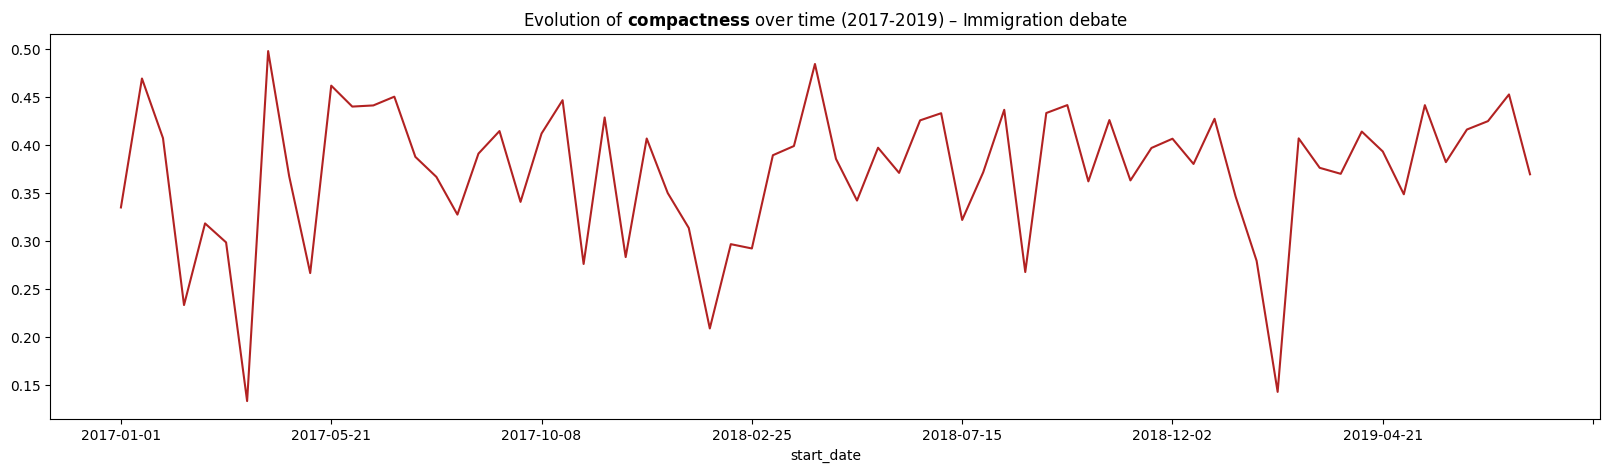

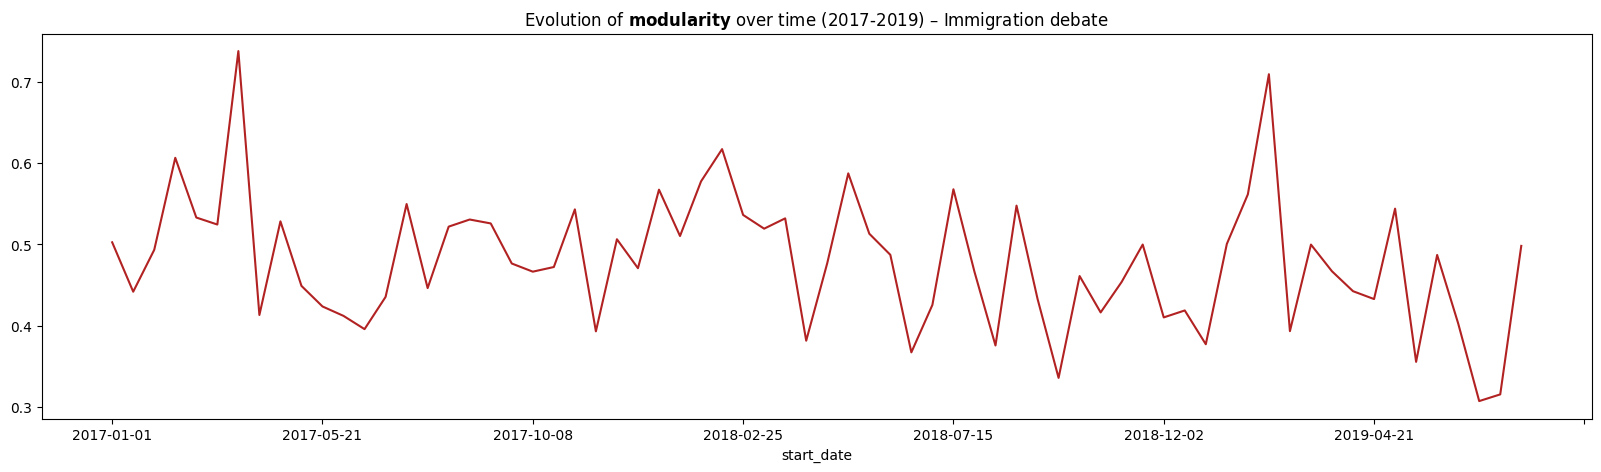

In [49]:
columns_to_plot = ['nodes_number', 'edges_number', 'density', 'avg_degree', 'compactness', 'modularity']
plot_df = df.set_index("start_date")

for column in columns_to_plot:
    title=column.replace('_', '')
    plt.figure(figsize=(20, 5))
    plot_df[column].plot(linestyle='-', color='firebrick')
    
    plt.title(f'Evolution of $\mathbf{{{title}}}$ over time (2017-2019) – {topic_name}')
    plt.show()

# Plot – CLIMATE

In [23]:
plot_df = df.set_index("start_date")

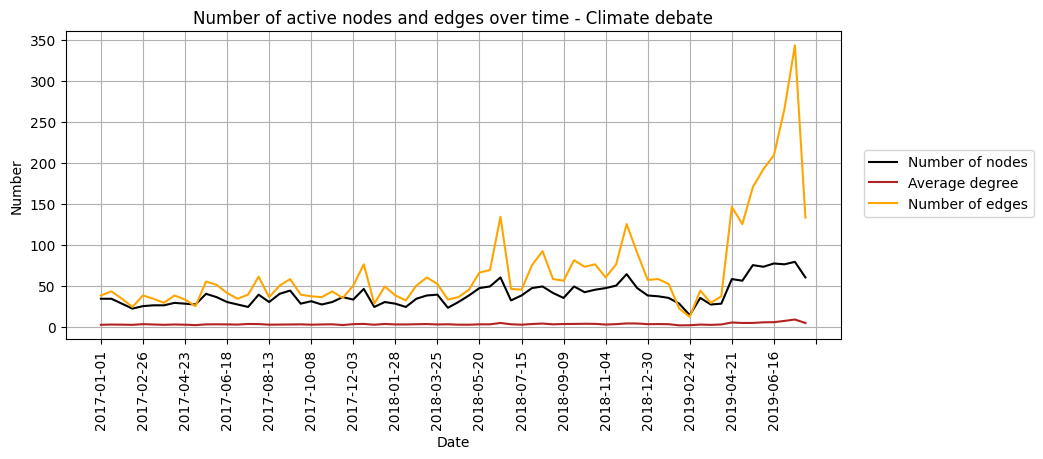

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(plot_df['nodes_number'], linestyle='-', color='black', label='Number of nodes')
ax1.plot(plot_df['avg_degree'], linestyle='-', color='firebrick', label='Average degree')
ax1.plot(plot_df['edges_number'], linestyle='-', color='orange', label='Number of edges')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

#ax2 = ax1.twinx()
#ax2.plot(plot_df['avg_degree'], linestyle='-', color='firebrick', label='Average degree')
#ax2.set_ylabel('Number of edges')
#ax2.tick_params(axis='y')

fig.legend(loc='right',bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Number of active nodes and edges over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

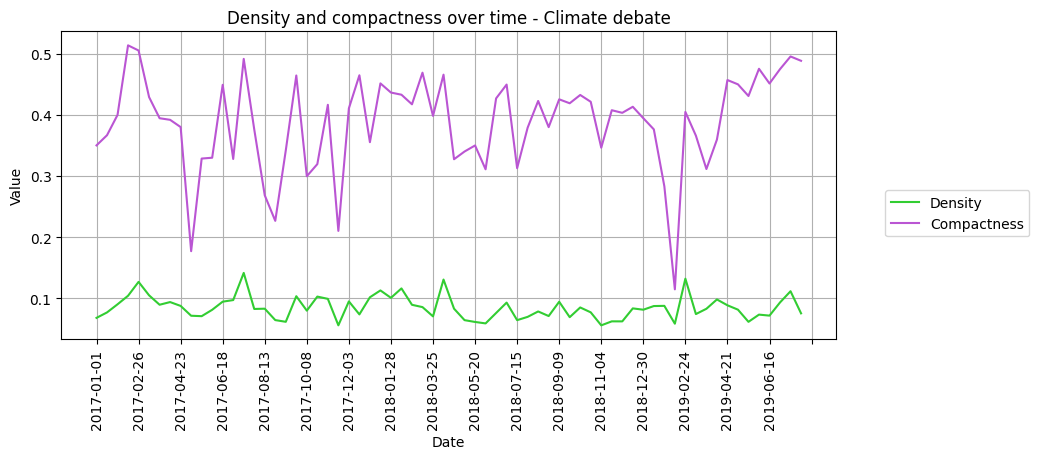

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(plot_df['density'], linestyle='-', color='limegreen', label='Density')
ax1.plot(plot_df['compactness'], linestyle='-', color='mediumorchid', label='Compactness')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.tick_params(axis='y')
ax1.grid(True)

#ax2 = ax1.twinx()
#ax2.plot(plot_df['compactness'], linestyle='-', color='mediumorchid', label='Compactness')
#ax2.set_ylabel('Compactness')
#ax2.tick_params(axis='y')

fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Density and compactness over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

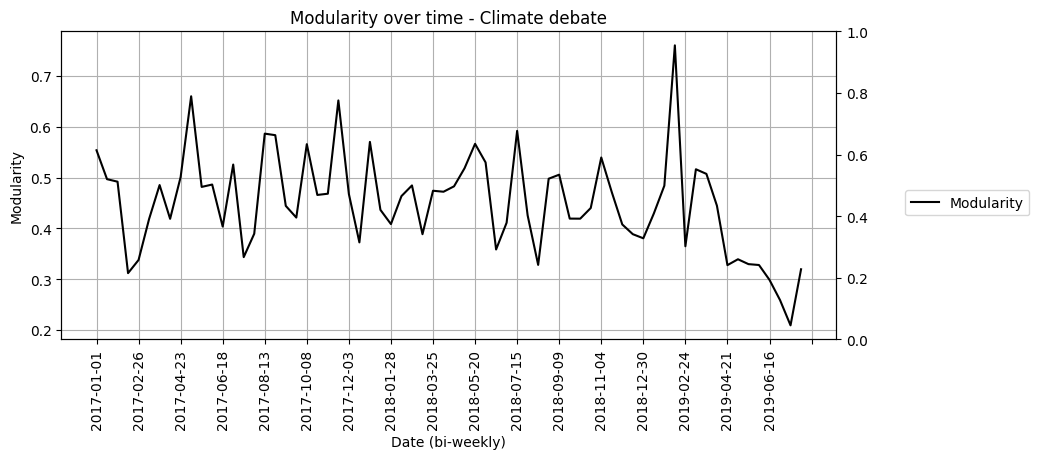

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(plot_df['modularity'], linestyle='-', color='black', label='Modularity')
#ax2.plot(plot_df['communities_number'], linestyle='-', color='grey',label='Number of communities')
ax1.set_xlabel('Date (bi-weekly)')
ax1.set_ylabel('Modularity')
#ax2.set_ylabel('Number of Communities')
ax1.tick_params(axis='y')
ax1.grid(True)

fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.5))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.title(f'Modularity over time - {topic_name}')
ax1.xaxis.set_major_locator(MultipleLocator(4))
plt.show()

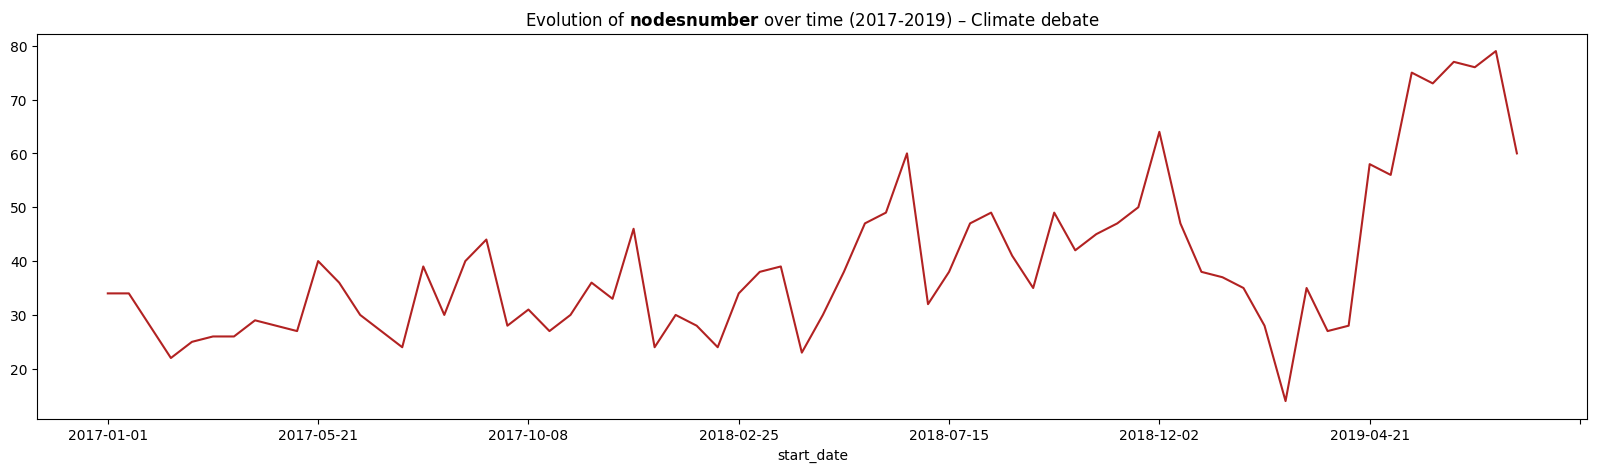

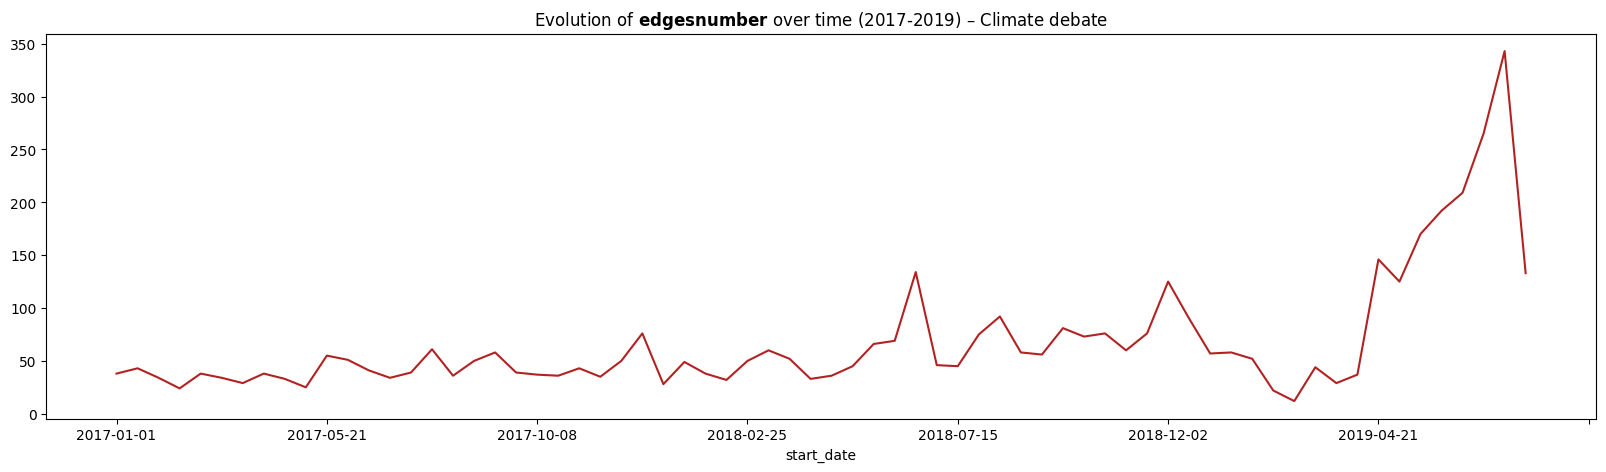

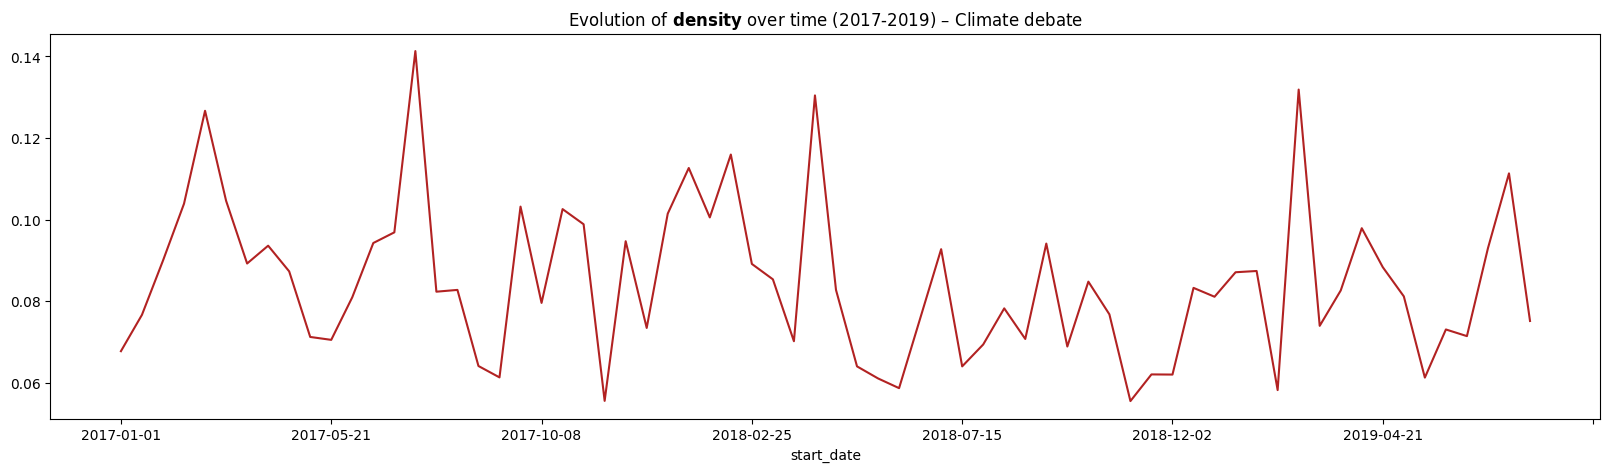

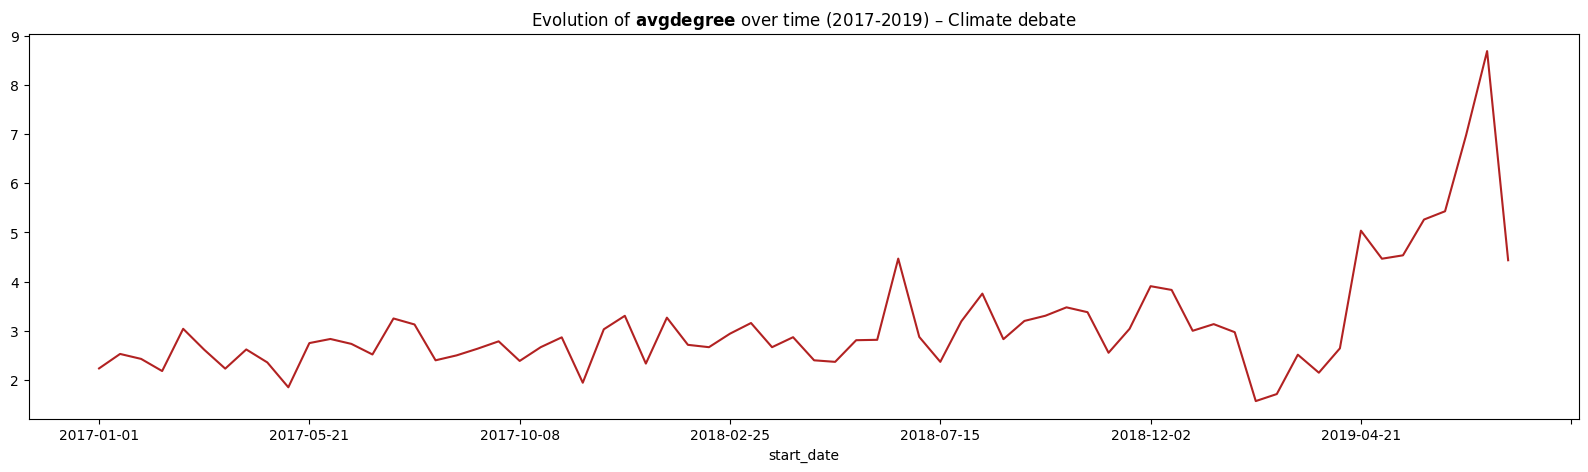

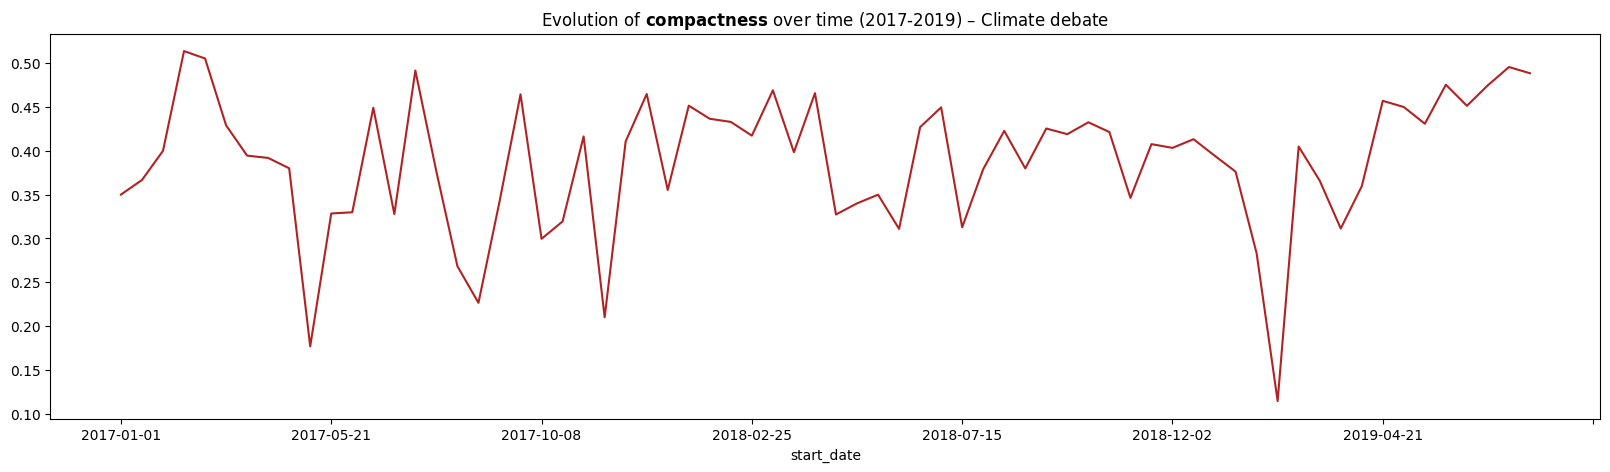

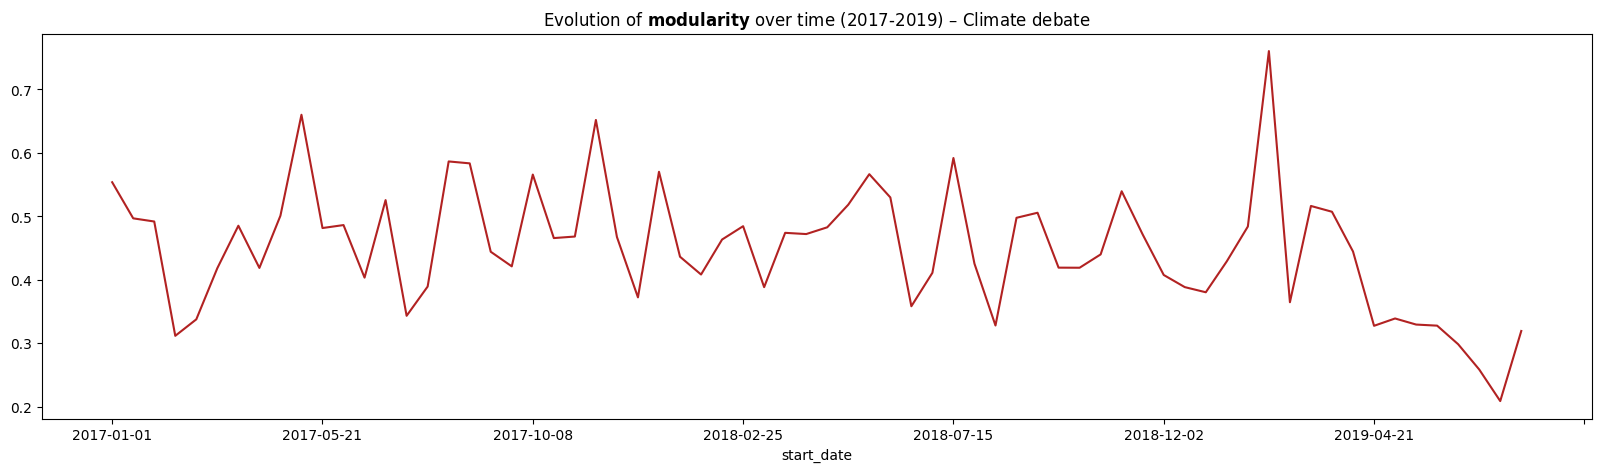

In [27]:
columns_to_plot = ['nodes_number', 'edges_number', 'density', 'avg_degree', 'compactness', 'modularity']
plot_df = df.set_index("start_date")

for column in columns_to_plot:
    title=column.replace('_', '')
    plt.figure(figsize=(20, 5))
    plot_df[column].plot(linestyle='-', color='firebrick')
    
    plt.title(f'Evolution of $\mathbf{{{title}}}$ over time (2017-2019) – {topic_name}')
    plt.show()